<a href="https://colab.research.google.com/github/raulc66/AI-Learning/blob/main/CNN_for_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 : Importing the libraries

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2 : Importing the dataset from Kaggle to google colab

In [ ]:
# install the kaggle API
! pip install -q kaggle

In [ ]:
# create a directory as kaggle
! mkdir ~/.kaggle

In [ ]:
# importing the kaggle API
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# copy API key to kaggle directory
! cp kaggle.json ~/.kaggle

In [ ]:
# disable the API key
! chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# list of downloadable datasets
! kaggle datasets list

ref                                                              title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
asinow/car-price-dataset                                         Car Price Dataset                                135KB  2025-01-26 19:53:28          20046        322  1.0              
abdulmalik1518/mobiles-dataset-2025                              Mobiles Dataset (2025)                            20KB  2025-02-18 06:50:24           3805         72  1.0              
himelsarder/coffee-shop-daily-revenue-prediction-dataset         Coffee Shop Daily Revenue Prediction Dataset      30KB  2025-02-07 07:29:16           2141         26  1.0              
mahmoudelhemaly/students-grading-dataset                         Stude

In [ ]:
# import the dataset
! kaggle datasets download mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 97% 64.0M/66.0M [00:02<00:00, 42.1MB/s]
100% 66.0M/66.0M [00:02<00:00, 31.3MB/s]


In [ ]:
# unzip the dataset
! unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
dataset_1 = pd.read_csv('/content/creditcard.csv')

In [ ]:
dataset_1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Step 3 : Data Preprocessing

In [ ]:
dataset_1.shape

(284807, 31)

In [ ]:
# cheking the null values
dataset_1.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# observations in each class --> number of values contained within the target variable. --> The dataset is highly unbalanced
dataset_1['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
# balance the dataset
fraud = dataset_1[dataset_1['Class']==1]
non_fraud = dataset_1[dataset_1['Class']==0]

In [ ]:
fraud.shape, non_fraud.shape

((492, 31), (284315, 31))

In [ ]:
# random selection of samples
non_fraud_t = non_fraud.sample(n=492)

In [ ]:
non_fraud_t.shape

(492, 31)

In [ ]:
# merge dataset --> creating a new dataset, having a blanced number of fraud and non_fraud transactions | the number of non-fraudulent actions to be checked is reduced to the number of fraudulent ones
dataset = pd.concat([fraud,non_fraud_t],ignore_index = True)

In [ ]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [ ]:
dataset['Class'].value_counts()

,count
Class,
1,492
0,492


In [ ]:
# matrix of features
x = dataset.drop(labels = ['Class'], axis = 1)

In [ ]:
# dependent variable --> it contains the rows of the given column
y = dataset['Class']

In [ ]:
x.shape, y.shape

((984, 30), (984,))

In [ ]:
# splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [ ]:
x_train.shape , x_test.shape

((787, 30), (197, 30))

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test) # no need for fitting, already done above

In [ ]:
x_train

array([[-0.551881  ,  0.31039175, -0.32161057, ..., -0.14253532,
         0.09796573, -0.4646319 ],
       [-0.79571595,  0.49149813, -0.09230596, ...,  0.48124488,
         0.63997261, -0.46577635],
       [-0.83260834,  0.17331992,  0.10446379, ...,  0.31743126,
         0.4840688 , -0.4646319 ],
       ...,
       [ 1.21691545,  0.40764315, -0.13374687, ..., -0.41993503,
        -0.30877893,  0.10425681],
       [-0.39568105,  0.26114712, -0.31772438, ..., -0.11534088,
         0.08383559, -0.40807683],
       [-0.22954054,  0.60661827, -0.66079083, ..., -0.27901519,
        -0.07283678,  0.38417103]])

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
x_train.shape , x_test.shape

((787, 30), (197, 30))

In [ ]:
# reshape the dataset
x_train = x_train.reshape(787, 30, 1) # changing 1-D to 2-D vectors
x_test = x_test.reshape(197, 30, 1)

# Step 4 : Building the model

In [ ]:
# defining an object
model = tf.keras.models.Sequential()

In [ ]:
# add first CNN layer  -> same padding is adding a padding in order to create a square matrix , activation function brings non-linearity to the model
model.add(tf.keras.layers.Conv1D(filters = 32, kernel_size=2, padding = 'same', activation = 'relu', input_shape =(30, 1)))

# batch normalization --> adds stability to the network
model.add(tf.keras.layers.BatchNormalization())

# add maxpool layer --> it selects the maximum value from each batch

model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# add second CNN layer  -> same padding is adding a padding in order to create a square matrix , activation function brings non-linearity to the model
model.add(tf.keras.layers.Conv1D(filters = 64, kernel_size=2, padding = 'same', activation = 'relu'))

# batch normalization --> adds stability to the network
model.add(tf.keras.layers.BatchNormalization())

# add maxpool layer --> it selects the maximum value from each batch

model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [ ]:
# add flatten layer
model.add(tf.keras.layers.Flatten())

In [ ]:
# add first dense layer
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))

# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [ ]:
# second dense layer - output layer

model.add(tf.keras.layers.Dense(units = 1, activation ='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 30, 32)              │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 15, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 15, 64)              │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 15, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 7, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 448)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          28,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,441 (130.63 KB)

 Trainable params: 33,249 (129.88 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [ ]:
model.compile(optimizer=opt, loss = 'binary_crossentropy', metrics =['accuracy'])

# Step : 5 Training the model

In [ ]:
history = model.fit(x_train, y_train, epochs= 25, validation_data=(x_test, y_test))

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 224ms/step - accuracy: 0.5278 - loss: 1.1370 - val_accuracy: 0.4619 - val_loss: 0.6896
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6552 - loss: 0.7315 - val_accuracy: 0.6904 - val_loss: 0.6283
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7315 - loss: 0.6209 - val_accuracy: 0.7360 - val_loss: 0.5852
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7541 - loss: 0.5310 - val_accuracy: 0.7208 - val_loss: 0.5525
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7834 - loss: 0.4577 - val_accuracy: 0.7259 - val_loss: 0.5245
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8388 - loss: 0.4141 - val_accuracy: 0.7360 - val_loss: 0.4952
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8300 - loss: 0.3903 - val_accuracy: 0.7614 - val_loss: 0.4654
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8566 - loss: 0.3445 - val_accuracy: 0.7868 - val_lo

In [ ]:
# model prediction
y_pred = (model.predict(x_test) > 0.5).astype(int)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


In [ ]:
# individual predictions
print(y_pred[12]), print(y_test[12])

[1]
1


(None, None)

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[103   3]
 [ 10  81]]


In [ ]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.934010152284264


# Step 6: Learning Curve

In [ ]:
def learning_curve(history, epoch):
  # training versus validation accuracy
  epoch_range = range(1, epoch +1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy ')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','val'], loc= 'upper left')
  plt.show()



  # training versus validation loss

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','val'], loc= 'upper left')
  plt.show()

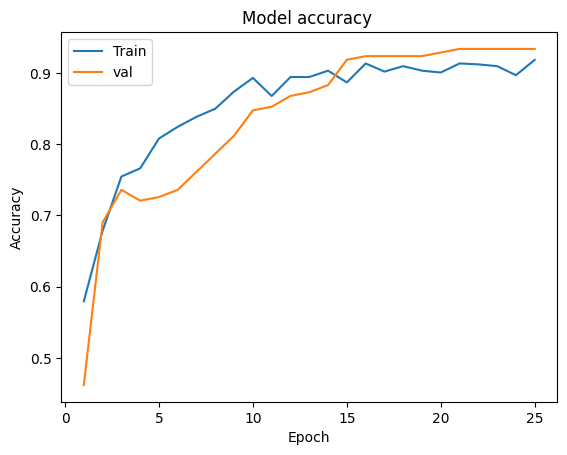

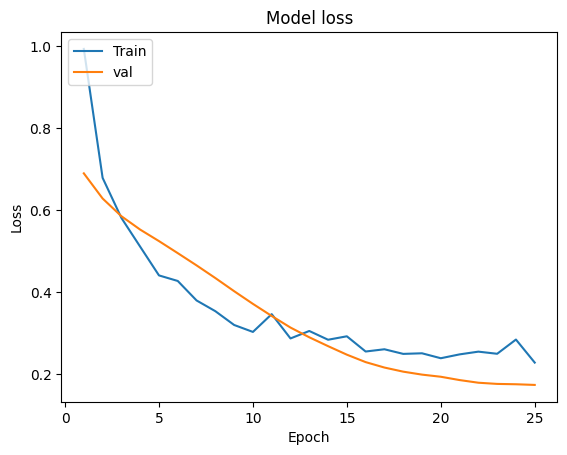

In [ ]:
learning_curve(history, 25)